In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from celmech.maps import EncounterMap
import sympy
from sympy import Matrix, symbols,cos,diff,sin

# Series expansion for stable/unstable manifold of 2D map

Let $x_*$ be an unstable equilibrium of map $T$; i.e., $T(x_*)=x_*$. 
The eigenvalues of $DT(x_*)$ are $\lambda>1$ and $\lambda^{-1}$ with eigenvectors
$\hat{x}_u$ and $\hat{x}_s$, respectively.

The unstable manifold is a 1D curve that can be parameterized as
$$
x_u(s) = x_* + s \hat{x}_u + f(s)\hat{x}_{\perp}
$$
where $\hat{x}_{\perp}$ is the unit vector in the direction perpendicular to $\hat{x}_u$.

Since the unstable manifold is an invariant set $T[x_u(s)] = x_u(g(s))$ for some (monotincally increasing) function $g$.
In other words,
$$
T[x_u(s)] = g(s)\hat{x}_u  + f(g(s))\hat{x}_{\perp}
%\sum_{n=0}^\infty \frac{f(s)^n}{n!}x_{u,n}~.
$$

We can Taylor-expand $g(s) = \sum_{n=0}^\infty \frac{s^n}{n!}g_n$ and $f(s)= \sum_{n=2}^\infty \frac{s^n}{n!}f_n$.
<!-- and write 
$$
\sum_{n=0}^\infty \frac{1}{n!}\left(\sum_{m=0}^\infty \frac{s^m}{m!}f_m\right)^n x_{u,n} = T\left[\sum_{n=0}^\infty \frac{s^n}{n!}x_{u,n}\right]
$$ -->

$$
T\left[x_* + s \hat{x}_u + \left(\sum_{n=2}^\infty \frac{s^n}{n!}f_n\right)\hat{x}_{\perp}\right]
    =
    \left(\sum_{n=0}^\infty \frac{s^n}{n!}g_n\right)\hat{x}_u + \left(\sum_{n=2}^\infty \frac{1}{n!}f_n\left(\sum_{n=0}^\infty \frac{s^n}{n!}g_n\right)^n\right)\hat{x}_\perp
$$

To make calculations are more covenient, define the map $T'(y) = R\cdot \left( T(x_* + R^{-1}\cdot y ) - x_*\right)$ where $R$ is a linear transformation satisfying 
$$
\begin{pmatrix}
\hat{x}_u\\
\hat{x}_\perp 
\end{pmatrix}
 =
 R
 \cdot
\begin{pmatrix}
    \hat{x}_1 \\
    \hat{x}_2
  \end{pmatrix}~.
$$
I.e., $T'$ is the map in a new coordinate system centerned on the unstable fixed point with one axis oriented along the unstable direction and the other orthogonal to it.
Lets write the map explicitly as 
$$
T'(y_1,y_2) = \begin{pmatrix} T'_u(y_1,y_2) \\ T'_\perp(y_1,y_2) \end{pmatrix}
$$
The equations for $f$ and $g$ become
$$
\begin{align}
T'_u(u,f(u)) &= g(u)\\
T'_\perp(u,f(u)) &= f(g(u))
\end{align}
$$
By Taylor-epanding these equations, we can develop an iterative proceduce for determining the Taylor-series coefficients $f_n$ and $g_n$. 
Solution to the first order shows that $g_1=\lambda_u$ and $f_1 = 0$.
In general, equating the right- and left-hand side series coefficients at the $n$th step will give two linear equations in two unkowns of the form
$$
\begin{align}
\Psi_{u}(n) + {T'_u}^{(0,1)}f_n &= g_n\\
\Psi_{\perp}(n)+ {T'_{\perp}}^{(0,1)}f_n &= \lambda_u^nf_n + \sum_{k=2}^{n-1} f_k B_{n,k}(g_1,...,g_{n-k+1})
\end{align}
$$
where $B_{n,k}$ are [partial Bell polynomials](https://en.wikipedia.org/wiki/Faà_di_Bruno%27s_formula), the expression $\Psi_{i}(n)$ involve derivatives up to order $n$ of $T_i$ and the coefficients $f_m$ for $m<n$ and we use the notation ${T'_{i}}^{(j,k)} = \frac{\partial^{(j+k)}}{\partial y_1^j \partial y_1^k}T'_i(y_1,y_2)\bigg|_{y_i=0}$
The first few $\Psi$s are:
$$
\begin{align}
   \Psi(2) &= T'^{(2,0)}\\
   \Psi(3) &= 3 f_2{T'}^{(1,1)} + T'^{(3,0)}\\
   \Psi(4) &= 3 f_2^2 {T'}^{(0,2)}+ 6 f_2{T}^{(2,1)} + 4f_3{T'}^{(1,1)}+{T'}^{(4,0)}
\end{align}
$$
The general formula is given by
$$
\begin{align}
\Psi(n)&=& \left(\frac{d^n}{du^n}T(u,f(u)) - T^{(0,1)}\frac{d^nf(u)}{du^n}\right)_{u=0}
\end{align}
$$


Compute the the expression 
 $$
 \frac{d}{du}C\prod_{m=0}^{N}\left(f^{(m)}(u)\right)^{p_m}
  = 
  C
  \prod_{m=0}^{N}\left(f^{(m)}(u)\right)^{p_m-1}
  \sum_{m'=0}p_m'{f^{(m'+1)}(u)}
 $$

In [3]:
from sympy import bell
def bell_poly_sum(n,farr,garr):
    """
    Evaluate the :math:`n`th derivative of :math:`f(g(x))`
    where 
     f(u) = f[0] + f[1]*u + f[2]*u^2/2 + ... + f[n]*u^n/n! + ...
     g(x) = g[0] + g[1]*x + g[2]*x^2/2 + ... + g[n]*x^n/n! + ...
    """
    #
    return np.sum([farr[k] * bell(n,k,garr[1:n-k+2]) for k in range(1,n)])
farr,garr = np.ones((2,10))
farr[:2] = 0
garr[0] = 0
bell_poly_sum(2,farr,garr)
from collections import defaultdict

def deriv_of_coeff_and_pows(coeff,pows):
    new_pows = np.append(pows,0)
    results = []
    for m in range(len(pows)):
        if new_pows[m]>0:
            new_pows = np.append(pows,0)
            new_pows[m]-=1
            new_pows[m+1]+=1
            results.append((coeff * pows[m], new_pows))
    return results

def _consolidate_coeff_and_pows_list(cp_list):
    pows_arr = np.array([_[1] for _ in cp_list])
    coeff_arr = np.array([_[0] for _ in cp_list])
    i = 0
    tot = 0
    result = []
    while tot < len(coeff_arr):
        pows = pows_arr[i]
        msk = np.alltrue(pows_arr==pows,axis=1)
        coeff = np.sum(coeff_arr[msk])
        result+=[(coeff,pows)]
        # next index of unique powers
        tot += np.sum(msk)
        i=i+np.argmin(msk[i:])
    return result


def get_Psi_dicts(n):
    PsiOld = {
        (0,1):[(1,np.array([0,1]))],
        (1,0):[(1,np.array([0,0]))]
    }
    Psis = [0,PsiOld]
    for m in range(1,n):
        PsiNew = defaultdict(list)
        for ij,coeffs_and_pows in PsiOld.items():
            i,j = ij
            PsiNew[(i+1,j)] += coeffs_and_pows
            for coeff,pows in coeffs_and_pows:
                PsiNew[(i,j)] += deriv_of_coeff_and_pows(coeff,pows)
                add_one = pows.copy()
                add_one[1] +=1
                PsiNew[(i,j+1)] += [(coeff,add_one)]
        PsiOld = PsiNew.copy()
        for ij, lst in PsiOld.items():
            PsiOld[ij] = _consolidate_coeff_and_pows_list(lst)
        Psis.append(PsiOld)
    return Psis

$$
\begin{pmatrix}
 T_1(\theta,p)\\
 T_2(\theta,p)
\end{pmatrix}
  = 
 \begin{pmatrix}
 \theta + p + f(\theta) \\
  p + f(\theta) 
\end{pmatrix}
$$

Derivatives:
$$
\begin{align}
 \frac{\partial}{\partial p}T_1(\theta,p) &=  1 \\
 \frac{\partial}{\partial p} T_2(\theta,p) &=  1 \\
  \frac{\partial}{\partial \theta}T_1(\theta,p) &=  1 + 2\pi f'(\theta)
\end{align}
$$
more
$$
 \frac{\partial^{n}}{\partial \theta^n}T_1(\theta,p)
  =  f^{(n)}(\theta)
$$

In [4]:
def get_derivs_tensor(N,k,theta):
    """
    Get tensor of Nth order derivatives.
    """
    shape_args = [2] + [2 for _ in range(N)]
    T = np.zeros(shape_args)
    msk=np.sum(np.indices([2 for _ in range(N)]),axis=0)==0
    T[:,msk] =  k * np.sin(0.5 * N * np.pi + theta)
    if N==1:
        T[:,1] = 1
        T[0,0] += 1
    return T
def rotate_derivs_tensor(T,theta_rot):
    Nderivs = len(T.shape) - 1
    s,c = np.sin(theta_rot),np.cos(theta_rot)
    R = np.array([[c,s],[-s,c]])
    RT = R.T
    args = [T,list(range(Nderivs+1))]
    
    i1 = Nderivs + 1
    args+= [R,[i1,0]]
    final_indices = [i1]
    i1 += 2 

    for i in range(Nderivs):
        final_indices.append(i1)
        args += [RT,[i+1,i1]]
        i1 += 2        
    args.append(final_indices)
    return np.einsum(*args)

In [5]:
def evaluate_Psi(Psi_dict,Tprimes,farr):
    tot = 0
    for ij,coeffs_and_pows_list in Psi_dict.items():
        i,j = ij 
        indx = tuple([0 for _ in range(i)] + [1 for _ in range(j)])
        N = len(indx)
        Tprime_ij = Tprimes[N][indx]
        sub_tot = 0
        for coeff,pows in coeffs_and_pows_list:
            npows = pows.shape[0]
            sub_tot += coeff * np.product(farr[:npows]**pows)
        tot+= Tprime_ij * sub_tot
    return tot

In [6]:
def evaluate_Psi_alt(Psi_dict,Tprimes_arr,farr):
    tot = 0
    for ij,coeffs_and_pows_list in Psi_dict.items():
        i,j = ij 
        Tprime_ij = Tprimes_arr[i,j]
        sub_tot = 0
        for coeff,pows in coeffs_and_pows_list:
            npows = pows.shape[0]
            sub_tot += coeff * np.product(farr[:npows]**pows)
        tot+= Tprime_ij * sub_tot
    return tot

# Series expansion for stable/unstable manifold of 2D map

Let $x_*$ be an unstable equilibrium of map $T$; i.e., $T(x_*)=x_*$. 
The eigenvalues of $DT(x_*)$ are $\lambda>1$ and $\lambda^{-1}$ with eigenvectors
$\hat{x}_u$ and $\hat{x}_s$, respectively.

The unstable manifold is a 1D curve that can be parameterized as
$$
x_u(s) = x_* + s \hat{x}_u + f(s)\hat{x}_{\perp}
$$
where $\hat{x}_{\perp}$ is the unit vector in the direction perpendicular to $\hat{x}_u$.

Since the unstable manifold is an invariant set $T[x_u(s)] = x_u(g(s))$ for some (monotincally increasing) function $g$.
In other words,
$$
T[x_u(s)] = g(s)\hat{x}_u  + f(g(s))\hat{x}_{\perp}
%\sum_{n=0}^\infty \frac{f(s)^n}{n!}x_{u,n}~.
$$

We can Taylor-expand $g(s) = \sum_{n=0}^\infty \frac{s^n}{n!}g_n$ and $f(s)= \sum_{n=2}^\infty \frac{s^n}{n!}f_n$.
<!-- and write 
$$
\sum_{n=0}^\infty \frac{1}{n!}\left(\sum_{m=0}^\infty \frac{s^m}{m!}f_m\right)^n x_{u,n} = T\left[\sum_{n=0}^\infty \frac{s^n}{n!}x_{u,n}\right]
$$ -->

$$
T\left[x_* + s \hat{x}_u + \left(\sum_{n=2}^\infty \frac{s^n}{n!}f_n\right)\hat{x}_{\perp}\right]
    =
    \left(\sum_{n=0}^\infty \frac{s^n}{n!}g_n\right)\hat{x}_u + \left(\sum_{n=2}^\infty \frac{1}{n!}f_n\left(\sum_{n=0}^\infty \frac{s^n}{n!}g_n\right)^n\right)\hat{x}_\perp
$$

To make calculations are more covenient, define the map $T'(y) = R\cdot \left( T(x_* + R^{-1}\cdot y ) - x_*\right)$ where $R$ is a linear transformation satisfying 
$$
\begin{pmatrix}
\hat{x}_u\\
\hat{x}_\perp 
\end{pmatrix}
 =
 R
 \cdot
\begin{pmatrix}
    \hat{x}_1 \\
    \hat{x}_2
  \end{pmatrix}~.
$$
I.e., $T'$ is the map in a new coordinate system centerned on the unstable fixed point with one axis oriented along the unstable direction and the other orthogonal to it.
Lets write the map explicitly as 
$$
T'(y_1,y_2) = \begin{pmatrix} T'_u(y_1,y_2) \\ T'_\perp(y_1,y_2) \end{pmatrix}
$$
The equations for $f$ and $g$ become
$$
\begin{align}
T'_u(u,f(u)) &= g(u)\\
T'_\perp(u,f(u)) &= f(g(u))
\end{align}
$$
By Taylor-epanding these equations, we can develop an iterative proceduce for determining the Taylor-series coefficients $f_n$ and $g_n$. 
Solution to the first order shows that $g_1=\lambda_u$ and $f_1 = 0$.
In general, equating the right- and left-hand side series coefficients at the $n$th step will give two linear equations in two unkowns of the form
$$
\begin{align}
\Psi_{u}(n) + {T'_u}^{(0,1)}f_n &= g_n\\
\Psi_{\perp}(n)+ {T'_{\perp}}^{(0,1)}f_n &= \lambda_u^nf_n + \sum_{k=2}^{n-1} f_k B_{n,k}(g_1,...,g_{n-k+1})
\end{align}
$$
where $B_{n,k}$ are [partial Bell polynomials](https://en.wikipedia.org/wiki/Faà_di_Bruno%27s_formula), the expression $\Psi_{i}(n)$ involve derivatives up to order $n$ of $T_i$ and the coefficients $f_m$ for $m<n$ and we use the notation ${T'_{i}}^{(j,k)} = \frac{\partial^{(j+k)}}{\partial y_1^j \partial y_1^k}T'_i(y_1,y_2)\bigg|_{y_i=0}$
The first few $\Psi$s are:
$$
\begin{align}
   \Psi(2) &= T'^{(2,0)}\\
   \Psi(3) &= 3 f_2{T'}^{(1,1)} + T'^{(3,0)}\\
   \Psi(4) &= 3 f_2^2 {T'}^{(0,2)}+ 6 f_2{T}^{(2,1)} + 4f_3{T'}^{(1,1)}+{T'}^{(4,0)}
\end{align}
$$
The general formula is given by
$$
\begin{align}
\Psi(n)&=& \left(\frac{d^n}{du^n}T(u,f(u)) - T^{(0,1)}\frac{d^nf(u)}{du^n}\right)_{u=0}
\end{align}
$$


In [7]:
def func_from_series(coeffs,x):
    return coeffs @ np.array([x**n/np.math.factorial(n) for n in range(coeffs.shape[0])])

def manifold_approx(u,n,farr,garr):
    f = lambda x: func_from_series(farr[:n+1],x)
    g = lambda x: func_from_series(garr[:n+1],x)
    
    p0 = np.array([u,f(u)])
    p1 = np.array([g(u),f(g(u))])
    
    return p0,p1

In [9]:
from celmech.maps import StandardMap

Nmax = 11
K =  2.3
smap = StandardMap(K)
T1 = get_derivs_tensor(1,K,0)
vals,vecs = np.linalg.eig(T1)
lambdaU = vals[0]
uvec = vecs[:,0]
theta_rot = np.arctan2(uvec[1],uvec[0])
s,c = np.sin(theta_rot),np.cos(theta_rot)
R = np.array([[c,s],[-s,c]])
Psis = get_Psi_dicts(Nmax)
TNs = [rotate_derivs_tensor(get_derivs_tensor(n,K,0),theta_rot) for n in range(Nmax+1)]
TNsU = [T[0] for T in TNs]
TNsPerp = [T[1] for T in TNs]
TU_01 = TNsU[1][1]
Tperp_01 = TNsPerp[1][1]
farr,garr = np.zeros((2,Nmax + 1))
garr[1] = lambdaU
#TU_01,Tperp_01
[Psi.pop((0,1)) for Psi in Psis[1:]]
for n in range(2,Nmax + 1):
    Psi_dict=Psis[n]
    PsiPerp = evaluate_Psi(Psi_dict,TNsPerp,farr)
    PsiU = evaluate_Psi(Psi_dict,TNsU,farr)
    denom = Tperp_01-lambdaU**n
    Bsum = bell_poly_sum(n,farr,garr)
    farr[n] = (Bsum-PsiPerp)/denom
    garr[n] = TU_01 * farr[n] + PsiU
    #print(n,farr[n],garr[n])

In [11]:
Psis[5]

defaultdict(list,
            {(4, 1): [(5, array([0, 1]))],
             (3, 1): [(10, array([0, 0, 1]))],
             (3, 2): [(10, array([0, 2]))],
             (2, 1): [(10, array([0, 0, 0, 1]))],
             (2, 2): [(30, array([0, 1, 1]))],
             (2, 3): [(10, array([0, 3]))],
             (1, 1): [(5, array([0, 0, 0, 0, 1]))],
             (1, 2): [(20, array([0, 1, 0, 1])), (15, array([0, 0, 2, 0]))],
             (1, 3): [(30, array([0, 2, 1]))],
             (1, 4): [(5, array([0, 4]))],
             (0, 2): [(5, array([0, 1, 0, 0, 1])),
              (10, array([0, 0, 1, 1, 0])),
              (0, array([ 0,  1, -1,  2,  0])),
              (5, array([0, 1, 0, 0, 1]))],
             (0, 3): [(10, array([0, 2, 0, 1])), (15, array([0, 1, 2, 0]))],
             (0, 4): [(10, array([0, 3, 1]))],
             (0, 5): [(1, array([0, 5]))],
             (5, 0): [(1, array([0, 0]))],
             (4, 0): []})

In [16]:
farr[7]

-0.00041540993397274104

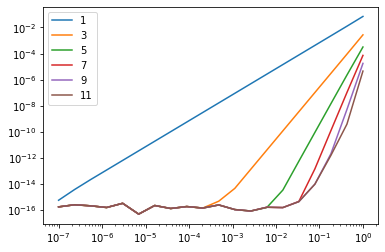

In [10]:
for nmax in [1,3,5,7,9,11]:
    u0s = np.logspace(-7,0,20)
    errors = []
    for u0 in u0s:
        p0,p1_approx=manifold_approx(u0,nmax,farr,garr)
        p1 = R @ smap(R.T @ p0)
        errors.append(np.linalg.norm((p1-p1_approx))/np.linalg.norm(p1))
    plt.plot(u0s,errors,label=nmax)
plt.legend()
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1e-16,1e-11)

In [11]:
smap.mod_p = False
smap.mod_theta = False

nmax=11
u0=2e-2
p0,p1_approx=manifold_approx(u0,nmax,farr,garr)
p1 = R @ smap(R.T @ p0)
(np.linalg.norm((p1-p1_approx))/np.linalg.norm(p1))
u1 = func_from_series(garr,u0)

Tprime = lambda p: R @ smap(R.T @ p)

mymod = lambda x: np.mod(x+np.pi,2*np.pi)-np.pi
uvals = np.linspace(u0,u1,5000)
_,ps = manifold_approx(uvals,nmax,farr,garr)
x = np.array([1,1])
xs = []
for i in range(3500):
    xs.append(x)
    x = smap(x)
theta,p=np.array(xs).T
plt.plot(mymod(theta),mymod(p),'k.',ms=2)
thetaU,pU = ps
for n in range(9):
    ps = Tprime(ps)
    x,y = mymod((R.T @ ps))
    thetaU = np.concatenate((thetaU,x))
    pU = np.concatenate((pU,y))
    #plt.plot(*mymod((R.T @ ps)),'r.')


# thetaU,pU = mymod((R.T @ ps))

breaksX = np.abs(thetaU[1:] - thetaU[:-1])>np.pi
breaksY = np.abs(pU[1:] - pU[:-1])>np.pi

break_indices = np.arange(len(thetaU)-1)[np.logical_or(breaksX,breaksY)]
np.concatenate(([0],break_indices,[-1]))
for ilow,ihi in zip(break_indices[:-1],break_indices[1:]):
    plt.plot(thetaU[ilow+1:ihi],pU[ilow+1:ihi],'r-',lw=0.5)

# Encounter map

In [9]:
from celmech.maps import EncounterMap

([<matplotlib.axis.XTick at 0x7f8ed851b250>,
 [Text(-3.141592653589793, 0, '$-\\pi$'),
  Text(-1.5707963267948966, 0, '$-\\pi/2$'),
  Text(0.0, 0, '$0$'),
  Text(1.5707963267948966, 0, '$\\pi/2$'),
  Text(3.141592653589793, 0, '$\\pi$')])

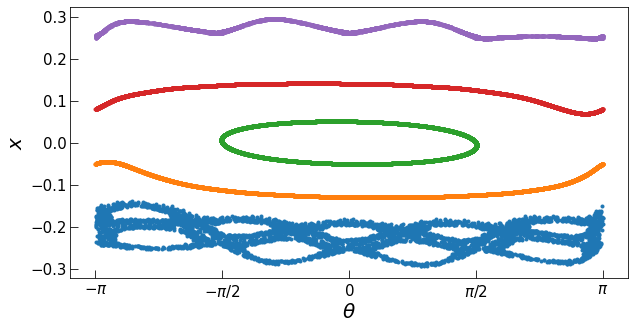

In [16]:
m=4.5e-5
J = 3
y = 0.5
x0max  = 0.25
Ntraj = 5
theta0 = np.pi/2
emap = EncounterMap(m,J,y,Nmax=20,mod=False)
N=5000
xvals = np.zeros((N,2))
fig,ax = plt.subplots(1,1,sharey=True,figsize=(10,5))
ax=[ax]
for x0 in np.linspace(-1 * x0max,x0max,Ntraj):
    x = [theta0,x0]
    for i in range(N):
        xvals[i] = x
        x=emap(x)
    theta,x = xvals.T
    ax[0].plot(np.mod(theta + np.pi,2*np.pi)-np.pi,x,'.')
ax[0].set_ylabel(r"$x$",fontsize = 20)
plt.xlabel(r"$\theta$",fontsize = 20)
plt.tick_params(direction='in',labelsize=15,size=8)
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],[r"$-\pi$",r"$-\pi/2$",r"$0$",r"$\pi/2$",r"$\pi$"])

$$
\begin{pmatrix}
 T_1(\theta,x)\\
 T_2(\theta,x)
\end{pmatrix}
  = 
 \begin{pmatrix}
 \theta + 2\pi (x + \epsilon f(\theta)) \\
  x + \epsilon f(\theta) 
\end{pmatrix}
$$

Derivatives:
$$
\begin{align}
 \frac{\partial}{\partial p}T_1(\theta,p) &=  1 \\
 \frac{\partial}{\partial p} T_2(\theta,p) &=  1 \\
  \frac{\partial}{\partial \theta}T_1(\theta,p) &=  1 + 2\pi f'(\theta)
\end{align}
$$
more
$$
 \frac{\partial^{n}}{\partial \theta^n}T_1(\theta,p)
  =  f^{(n)}(\theta)
$$

In [23]:
from scipy.special import binom
def get_derivs_array(Nmax,mapfn,theta):
    T = np.zeros((2,Nmax+1,Nmax+1))
    T[0][0,1] = 2 * np.pi
    T[1][0,1] = 1
    n=1
    eps_fn = mapfn.eps * mapfn.dfdtheta_n(theta,n)
    T[0][1,0] = 1 + 2 * np.pi * eps_fn
    T[1][1,0] = eps_fn
    for n in range(2,Nmax+1):
        eps_fn = mapfn.eps * mapfn.dfdtheta_n(theta,n)
        T[0][n,0] = 2 * np.pi * eps_fn
        T[1][n,0] = eps_fn
    return T
def to_uv_derivs(T,n,m,c,s):
    tot = np.zeros(2)
    R = np.array([[c,s],[-s,c]])
    for l in range(n+1):
        binom_nl = binom(n,l)
        for l1 in range(m+1):
            cfactor = c**(m+l-l1)
            sfactor = s**(n-l+l1)
            coeff = (-1)**l1 * binom_nl * binom(m,l1) * cfactor * sfactor
            tot +=  coeff * T[:,l+l1,n+m-l-l1]
    return R @ tot
def rotate_derivs_array(T,theta_rot):
    c,s = np.cos(theta_rot),np.sin(theta_rot)
    T1 = np.zeros(T.shape)
    for n in range(1,T.shape[1]):
        for l in range(n+1):
            T1[:,l,n-l] = to_uv_derivs(T,l,n-l,c,s)
    return T1

In [7]:
T_deriv_arr = get_derivs_array(3,emap,0)
T1_deriv_arr = rotate_derivs_array(T_deriv_arr,theta_rot)

NameError: name 'theta_rot' is not defined

In [8]:
partials = emap.partial_derivs((0,0),3)

In [9]:
inv_partials = emap.inv_partial_derivs((0,0),2)

In [18]:
def get_derivs_tensor(N,mapfn,theta):
    """
    Get tensor of Nth order derivatives.
    """
    shape_args = [2] + [2 for _ in range(N)]
    T = np.zeros(shape_args)
    msk=np.sum(np.indices([2 for _ in range(N)]),axis=0)==0
    eps_fn = mapfn.eps * mapfn.dfdtheta_n(theta,N)
    T[0,msk] = 2*np.pi * eps_fn
    T[1,msk] = eps_fn
    if N==1:
        T[0,1] = 2 * np.pi
        T[1,1] = 1
        T[0,0] += 1
    return T
def rotate_derivs_tensor(T,theta_rot):
    Nderivs = len(T.shape) - 1
    s,c = np.sin(theta_rot),np.cos(theta_rot)
    R = np.array([[c,s],[-s,c]])
    RT = R.T
    args = [T,list(range(Nderivs+1))]
    
    i1 = Nderivs + 1
    args+= [R,[i1,0]]
    final_indices = [i1]
    i1 += 2 

    for i in range(Nderivs):
        final_indices.append(i1)
        args += [RT,[i+1,i1]]
        i1 += 2        
    args.append(final_indices)

    return np.einsum(*args)

In [19]:
from sympy import bell
def bell_poly_sum(n,farr,garr):
    """
    Evaluate the :math:`n`th derivative of :math:`f(g(x))`
    where 
     f(u) = f[0] + f[1]*u + f[2]*u^2/2 + ... + f[n]*u^n/n! + ...
     g(x) = g[0] + g[1]*x + g[2]*x^2/2 + ... + g[n]*x^n/n! + ...
    """
    #
    return np.sum([farr[k] * bell(n,k,garr[1:n-k+2]) for k in range(1,n)])
farr,garr = np.ones((2,10))
farr[:2] = 0
garr[0] = 0
bell_poly_sum(2,farr,garr)

from collections import defaultdict

def deriv_of_coeff_and_pows(coeff,pows):
    new_pows = np.append(pows,0)
    results = []
    for m in range(len(pows)):
        if new_pows[m]>0:
            new_pows = np.append(pows,0)
            new_pows[m]-=1
            new_pows[m+1]+=1
            results.append((coeff * pows[m], new_pows))
    return results

def _consolidate_coeff_and_pows_list(cp_list):
    pows_arr = np.array([_[1] for _ in cp_list])
    coeff_arr = np.array([_[0] for _ in cp_list])
    i = 0
    tot = 0
    result = []
    while tot < len(coeff_arr):
        pows = pows_arr[i]
        msk = np.alltrue(pows_arr==pows,axis=1)
        coeff = np.sum(coeff_arr[msk])
        result+=[(coeff,pows)]
        # next index of unique powers
        tot += np.sum(msk)
        i=i+np.argmin(msk[i:])
    return result


def get_Psi_dicts(n):
    PsiOld = {
        (0,1):[(1,np.array([0,1]))],
        (1,0):[(1,np.array([0,0]))]
    }
    Psis = [0,PsiOld]
    for m in range(1,n):
        PsiNew = defaultdict(list)
        for ij,coeffs_and_pows in PsiOld.items():
            i,j = ij
            PsiNew[(i+1,j)] += coeffs_and_pows
            for coeff,pows in coeffs_and_pows:
                PsiNew[(i,j)] += deriv_of_coeff_and_pows(coeff,pows)
                add_one = pows.copy()
                add_one[1] +=1
                PsiNew[(i,j+1)] += [(coeff,add_one)]
        PsiOld = PsiNew.copy()
        for ij, lst in PsiOld.items():
            PsiOld[ij] = _consolidate_coeff_and_pows_list(lst)
        Psis.append(PsiOld)
    return Psis

In [26]:
def evaluate_Psi_alt(Psi_dict,Tprimes_arr,farr):
    tot = 0
    for ij,coeffs_and_pows_list in Psi_dict.items():
        i,j = ij 
        Tprime_ij = Tprimes_arr[i,j]
        sub_tot = 0
        for coeff,pows in coeffs_and_pows_list:
            npows = pows.shape[0]
            sub_tot += coeff * np.product(farr[:npows]**pows)
        tot+= Tprime_ij * sub_tot
    return tot

In [21]:
def func_from_series(coeffs,x):
    return coeffs @ np.array([x**n/np.math.factorial(n) for n in range(coeffs.shape[0])])

def manifold_approx(u,n,farr,garr):
    f = lambda x: func_from_series(farr[:n+1],x)
    g = lambda x: func_from_series(garr[:n+1],x)
    
    p0 = np.array([u,f(u)])
    p1 = np.array([g(u),f(g(u))])
    
    return p0,p1

In [24]:
vals,vecs=np.linalg.eig(emap.jac((np.pi,0)))
lambdaU = vals[0]
uvec = vecs[:,0]
theta_rot=np.arctan2(uvec[1],uvec[0])
c,s = np.cos(theta_rot),np.sin(theta_rot)
R = np.array(([c,s],[-s,c]))



Nmax = 11
Psis = get_Psi_dicts(Nmax)

#T1_arr = rotate_derivs_array(get_derivs_array(Nmax,emap,0),theta_rot)
T1_arr = rotate_derivs_array(emap.partial_derivs((0,0),Nmax),theta_rot)
# TU_01 = TNsU[1][1]
# Tperp_01 = TNsPerp[1][1]
TU_01 = T1_arr[0][0,1]
Tperp_01 = T1_arr[1][0,1]

farr,garr = np.zeros((2,Nmax + 1))
garr[1] = lambdaU
#TU_01,Tperp_01
[Psi.pop((0,1)) for Psi in Psis[1:]]
for n in range(2,Nmax + 1):
    Psi_dict=Psis[n]
#     PsiPerp = evaluate_Psi_alt(Psi_dict,TNsPerp,farr)
#     PsiU = evaluate_Psi_alt(Psi_dict,TNsU,farr)
    PsiPerp = evaluate_Psi_alt(Psi_dict,T1_arr[1],farr)
    PsiU = evaluate_Psi_alt(Psi_dict,T1_arr[0],farr)


    denom = Tperp_01-lambdaU**n
    Bsum = bell_poly_sum(n,farr,garr)
    farr[n] = (Bsum-PsiPerp)/denom
    garr[n] = TU_01 * farr[n] + PsiU
    #print(n,farr[n],garr[n])

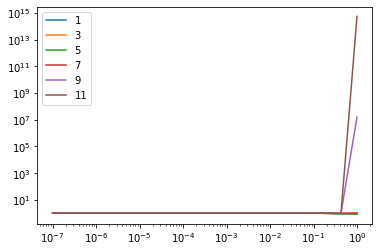

In [25]:
for nmax in [1,3,5,7,9,11]:
    u0s = np.logspace(-7,0,20)
    errors = []
    for u0 in u0s:
        p0,p1_approx=manifold_approx(u0,nmax,farr,garr)
        p1 = R @ emap(R.T @ p0)
        errors.append(np.linalg.norm((p1-p1_approx))/np.linalg.norm(p1))
    plt.plot(u0s,errors,label=nmax)
plt.legend()
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1e-16,1e-11)

In [21]:
nmax=11
u0=2e-2
p0,p1_approx=manifold_approx(u0,nmax,farr,garr)
p1 = R @ emap(R.T @ p0)
(np.linalg.norm((p1-p1_approx))/np.linalg.norm(p1))
u1 = func_from_series(garr,u0)
Tprime = lambda p: R @ emap(R.T @ p)

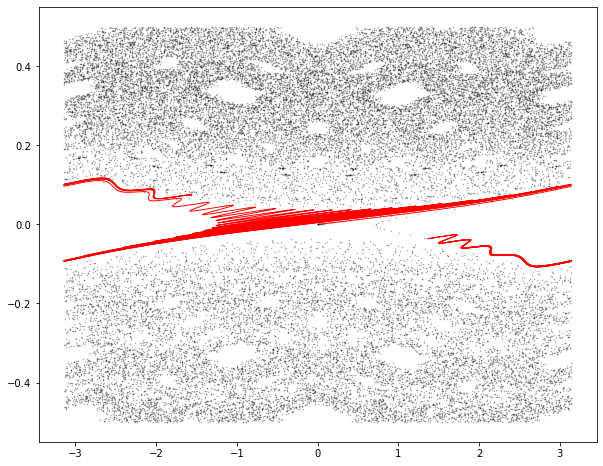

In [22]:
plt.figure(figsize=(10,8))
mymod = lambda x,val: np.mod(x+0.5*val,val)-0.5*val
x = np.array([0,1e-4])
xs = []
for i in range(35000):
    xs.append(x)
    x = emap(x)
theta,p=np.array(xs).T
plt.plot(mymod(theta,2*np.pi),mymod(p,1),'k.',ms=1,alpha=0.35)

uvals = np.linspace(u0,u1,10000)
_,ps = manifold_approx(uvals,nmax,farr,garr)
xvals,yvals =  ps
for _ in range(50):
    ps = Tprime(ps)
    x,y = ps
    xvals = np.concatenate((xvals,x))
    yvals = np.concatenate((yvals,y))

XU,YU = R.T @ np.array((xvals,yvals))
XU = mymod(XU,2*np.pi)
YU = mymod(YU,1)
breaksX = np.abs(XU[1:] - XU[:-1])>np.pi
breaksY = np.abs(YU[1:] - YU[:-1])>0.5
break_indices = np.arange(len(XU)-1)[np.logical_or(breaksX,breaksY)]
break_indices = np.concatenate(([0],break_indices,[-1]))
for ilow,ihi in zip(break_indices[:-1],break_indices[1:]):
    plt.plot(XU[ilow+1:ihi-1],YU[ilow+1:ihi-1],'r-',lw=0.95)

In [23]:
jac_inv = np.linalg.inv(emap.jac((0,0)))
vals,vecs = np.linalg.eig(jac_inv) 
lambdaU = vals[1]
uvec = vecs[:,1]
theta_rot=np.arctan2(uvec[1],uvec[0])
c,s = np.cos(theta_rot),np.sin(theta_rot)
Rinv = np.array(([c,s],[-s,c]))

Nmax = 11
Psis = get_Psi_dicts(Nmax)

T1_arr = rotate_derivs_array(emap.inv_partial_derivs((0,0),Nmax),theta_rot)

# TU_01 = TNsU[1][1]
# Tperp_01 = TNsPerp[1][1]
TU_01 = T1_arr[0][0,1]
Tperp_01 = T1_arr[1][0,1]

farr_inv,garr_inv = np.zeros((2,Nmax + 1))
garr_inv[1] = lambdaU
#TU_01,Tperp_01
[Psi.pop((0,1)) for Psi in Psis[1:]]
for n in range(2,Nmax + 1):
    Psi_dict=Psis[n]
#     PsiPerp = evaluate_Psi_alt(Psi_dict,TNsPerp,farr_inv)
#     PsiU = evaluate_Psi_alt(Psi_dict,TNsU,farr_inv)
    PsiPerp = evaluate_Psi_alt(Psi_dict,T1_arr[1],farr_inv)
    PsiU = evaluate_Psi_alt(Psi_dict,T1_arr[0],farr_inv)


    denom = Tperp_01-lambdaU**n
    Bsum = bell_poly_sum(n,farr_inv,garr_inv)
    farr_inv[n] = (Bsum-PsiPerp)/denom
    garr_inv[n] = TU_01 * farr_inv[n] + PsiU
    #print(n,farr_inv[n],garr_inv[n])

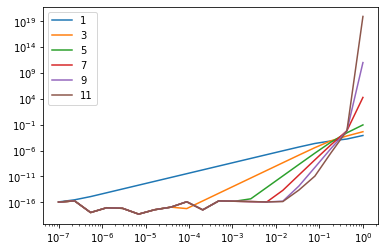

In [24]:
for nmax in [1,3,5,7,9,11]:
    u0s = np.logspace(-7,0,20)
    errors = []
    for u0 in u0s:
        p0,p1_approx=manifold_approx(u0,nmax,farr_inv,garr_inv)
        p1 = Rinv @ emap.inv(Rinv.T @ p0)
        errors.append(np.linalg.norm((p1-p1_approx))/np.linalg.norm(p1))
    plt.plot(u0s,errors,label=nmax)
plt.legend()
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1e-16,1e-11)

In [25]:
nmax=11
u0=2e-2
u1 = func_from_series(garr,u0)
u1inv = func_from_series(garr_inv,u0)
Tprime = lambda p: R @ emap(R.T @ p)
Tprime_inv = lambda p: Rinv @ emap.inv(Rinv.T @ p)


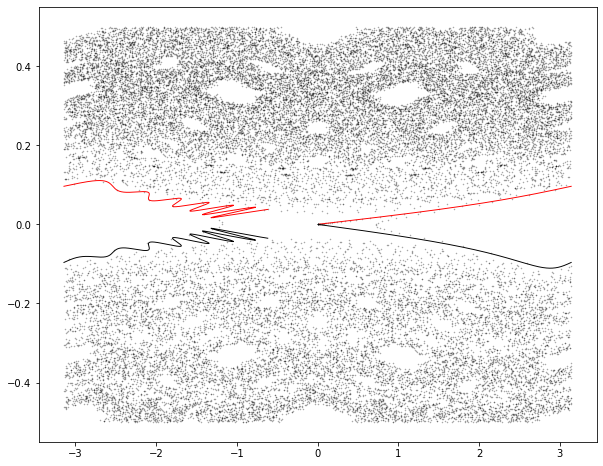

In [26]:
plt.figure(figsize=(10,8))
mymod = lambda x,val: np.mod(x+0.5*val,val)-0.5*val
x = np.array([0,1e-4])
xs = []
for i in range(35000):
    xs.append(x)
    x = emap(x)
theta,p=np.array(xs).T
plt.plot(mymod(theta,2*np.pi),mymod(p,1),'k.',ms=1,alpha=0.35)


Niter = 35
# Unstable manifold
uvals = np.linspace(u0,u1,5000)
_,ps = manifold_approx(uvals,nmax,farr,garr)
xvals,yvals =  ps
for _ in range(Niter):
    ps = Tprime(ps)
    x,y = ps
    xvals = np.concatenate((xvals,x))
    yvals = np.concatenate((yvals,y))

XU,YU = R.T @ np.array((xvals,yvals))
XU = mymod(XU,2*np.pi)
YU = mymod(YU,1)
breaksX = np.abs(XU[1:] - XU[:-1])>np.pi
breaksY = np.abs(YU[1:] - YU[:-1])>0.5
break_indices = np.arange(len(XU)-1)[np.logical_or(breaksX,breaksY)]
break_indices = np.concatenate(([0],break_indices,[-1]))
for ilow,ihi in zip(break_indices[:-1],break_indices[1:]):
    plt.plot(XU[ilow+1:ihi-1],YU[ilow+1:ihi-1],'r-',lw=0.95)

    
# Stable manifold
uvals = np.linspace(u0,u1inv,5000)
_,ps = manifold_approx(uvals,nmax,farr_inv,garr_inv)
xvals,yvals =  ps
for _ in range(Niter):
    ps = Tprime_inv(ps)
    x,y = ps
    xvals = np.concatenate((xvals,x))
    yvals = np.concatenate((yvals,y))

XU,YU = Rinv.T @ np.array((xvals,yvals))
XU = mymod(XU,2*np.pi)
YU = mymod(YU,1)
breaksX = np.abs(XU[1:] - XU[:-1])>np.pi
breaksY = np.abs(YU[1:] - YU[:-1])>0.5
break_indices = np.arange(len(XU)-1)[np.logical_or(breaksX,breaksY)]
break_indices = np.concatenate(([0],break_indices,[-1]))
for ilow,ihi in zip(break_indices[:-1],break_indices[1:]):
    plt.plot(XU[ilow+1:ihi-1],YU[ilow+1:ihi-1],'k-',lw=0.95)

(-0.2, 0.2)

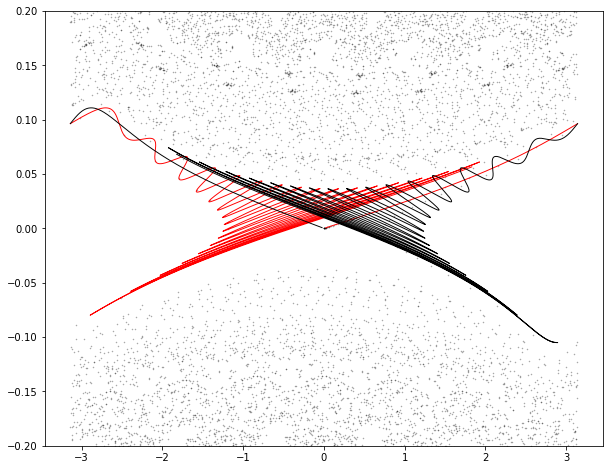

In [27]:
plt.figure(figsize=(10,8))
mymod = lambda x,val: np.mod(x+0.5*val,val)-0.5*val
x = np.array([0,1e-4])
xs = []
for i in range(35000):
    xs.append(x)
    x = emap(x)
theta,p=np.array(xs).T
plt.plot(mymod(theta,2*np.pi),mymod(p,1),'k.',ms=1,alpha=0.35)


Niter = 45
# Unstable manifold
uvals = np.linspace(u0,u1,5000)
_,ps = manifold_approx(uvals,nmax,farr,garr)
xvals,yvals =  ps
for _ in range(Niter):
    ps = Tprime(ps)
    x,y = ps
    xvals = np.concatenate((xvals,x))
    yvals = np.concatenate((yvals,y))

XU,YU = R.T @ np.array((xvals,yvals))
XU = mymod(XU,2*np.pi)
YU = mymod(YU,1)
breaksX = np.abs(XU[1:] - XU[:-1])>np.pi
breaksY = np.abs(YU[1:] - YU[:-1])>0.5
break_indices = np.arange(len(XU)-1)[np.logical_or(breaksX,breaksY)]
break_indices = np.concatenate(([0],break_indices,[-1]))
for ilow,ihi in zip(break_indices[:-1],break_indices[1:]):
    plt.plot(XU[ilow+1:ihi-1],YU[ilow+1:ihi-1],'r-',lw=0.95)

    
# Stable manifold
uvals = np.linspace(u0,u1inv,5000)
_,ps = manifold_approx(uvals,nmax,farr_inv,garr_inv)
xvals,yvals =  ps
for _ in range(Niter):
    ps = Tprime_inv(ps)
    x,y = ps
    xvals = np.concatenate((xvals,x))
    yvals = np.concatenate((yvals,y))

XU,YU = Rinv.T @ np.array((xvals,yvals))
XU = mymod(XU,2*np.pi)
YU = mymod(YU,1)
breaksX = np.abs(XU[1:] - XU[:-1])>np.pi
breaksY = np.abs(YU[1:] - YU[:-1])>0.5
break_indices = np.arange(len(XU)-1)[np.logical_or(breaksX,breaksY)]
break_indices = np.concatenate(([0],break_indices,[-1]))
for ilow,ihi in zip(break_indices[:-1],break_indices[1:]):
    plt.plot(-1*XU[ilow+1:ihi-1],-1*YU[ilow+1:ihi-1],'k-',lw=0.95)
plt.ylim(-0.2,0.2)

(-0.2, 0.2)

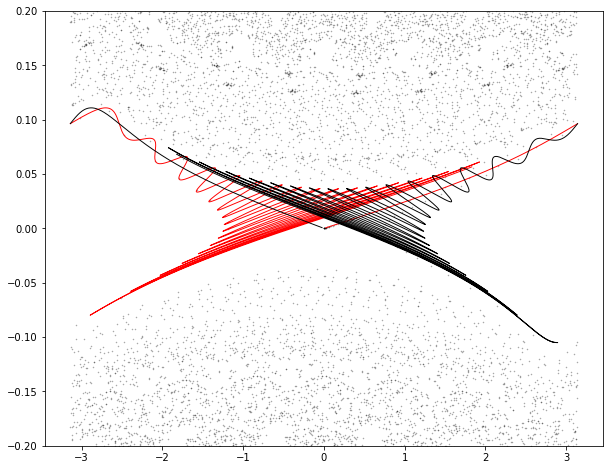

In [28]:
plt.figure(figsize=(10,8))
mymod = lambda x,val: np.mod(x+0.5*val,val)-0.5*val
x = np.array([0,1e-4])
xs = []
for i in range(35000):
    xs.append(x)
    x = emap(x)
theta,p=np.array(xs).T
plt.plot(mymod(theta,2*np.pi),mymod(p,1),'k.',ms=1,alpha=0.35)


Niter = 45
# Unstable manifold
uvals = np.linspace(u0,u1,5000)
_,ps = manifold_approx(uvals,nmax,farr,garr)
xvals,yvals =  ps
for _ in range(Niter):
    ps = Tprime(ps)
    x,y = ps
    xvals = np.concatenate((xvals,x))
    yvals = np.concatenate((yvals,y))

XU,YU = R.T @ np.array((xvals,yvals))
XU = mymod(XU,2*np.pi)
YU = mymod(YU,1)
breaksX = np.abs(XU[1:] - XU[:-1])>np.pi
breaksY = np.abs(YU[1:] - YU[:-1])>0.5
break_indices = np.arange(len(XU)-1)[np.logical_or(breaksX,breaksY)]
break_indices = np.concatenate(([0],break_indices,[-1]))
for ilow,ihi in zip(break_indices[:-1],break_indices[1:]):
    plt.plot(XU[ilow+1:ihi-1],YU[ilow+1:ihi-1],'r-',lw=0.95)

    
# Stable manifold
uvals = np.linspace(u0,u1inv,5000)
_,ps = manifold_approx(uvals,nmax,farr_inv,garr_inv)
xvals,yvals =  ps
for _ in range(Niter):
    ps = Tprime_inv(ps)
    x,y = ps
    xvals = np.concatenate((xvals,x))
    yvals = np.concatenate((yvals,y))

XU,YU = Rinv.T @ np.array((xvals,yvals))
XU = mymod(XU,2*np.pi)
YU = mymod(YU,1)
breaksX = np.abs(XU[1:] - XU[:-1])>np.pi
breaksY = np.abs(YU[1:] - YU[:-1])>0.5
break_indices = np.arange(len(XU)-1)[np.logical_or(breaksX,breaksY)]
break_indices = np.concatenate(([0],break_indices,[-1]))
for ilow,ihi in zip(break_indices[:-1],break_indices[1:]):
    plt.plot(-1*XU[ilow+1:ihi-1],-1*YU[ilow+1:ihi-1],'k-',lw=0.95)
plt.ylim(-0.2,0.2)

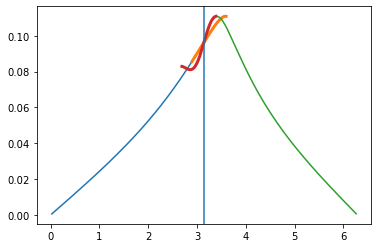

In [29]:
Niter = 29
# Unstable manifold
uvals = np.linspace(u0,u1,5000)
_,ps = manifold_approx(uvals,nmax,farr,garr)
xvals,yvals =  ps
for _ in range(Niter):
    ps = Tprime(ps)
    x,y = ps
    xvals = np.concatenate((xvals,x))
    yvals = np.concatenate((yvals,y))
XU,YU = R.T @ np.array((xvals,yvals))
plt.plot(XU,YU)
xlast,ylast = R.T @ np.array([x,y])
plt.plot(xlast,ylast,lw=3)



uvals = np.linspace(u0,u1inv,5000)
_,ps = manifold_approx(uvals,nmax,farr_inv,garr_inv)
xvals,yvals =  ps
for _ in range(Niter):
    ps = Tprime_inv(ps)
    x,y = ps
    xvals = np.concatenate((xvals,x))
    yvals = np.concatenate((yvals,y))

XS,YS = Rinv.T @ np.array((xvals,yvals))
plt.plot(2*np.pi-XS,-YS)
xlast,ylast = Rinv.T @ np.array([x,y])
plt.plot(2*np.pi-xlast,-ylast,lw=3)
plt.axvline(np.pi)

In [30]:
def get_pts(tS,tU,u0,NS,NU):
    
    u1U = func_from_series(garr,u0)
    u1S = func_from_series(garr_inv,u0)
    
    uU0 = (1-tU) * u0 + tU * u1U
    uS0 = (1-tS) * u0 + tS * u1S
    
    pU,_ = manifold_approx(uU0,nmax,farr,garr)
    pS,_ = manifold_approx(uS0,nmax,farr_inv,garr_inv)
    
    Upts =[pU]
    for _ in range(NU):
        pU = Tprime(pU)
        Upts.append(pU)
    Spts = [pS]
    for _ in range(NS):
        pS = Tprime_inv(pS)
        Spts.append(pS)
    Upts = R.T @ np.transpose(Upts)
    Spts = -1 * Rinv.T @ np.transpose(Spts)
    Spts[0]+=2*np.pi
    
    return Upts,Spts

def get_distance(tS,tU,u0,NS,NU):
    
    u1U = func_from_series(garr,u0)
    u1S = func_from_series(garr_inv,u0)
    
    uU0 = (1-tU) * u0 + tU * u1U
    uS0 = (1-tS) * u0 + tS * u1S
    
    pU,_ = manifold_approx(uU0,nmax,farr,garr)
    pS,_ = manifold_approx(uS0,nmax,farr_inv,garr_inv)
    
    for _ in range(NU):
        pU = Tprime(pU)
        
    for _ in range(NS):
        pS = Tprime_inv(pS)
        
    ptU = R.T @ pU
    ptS = np.array((2*np.pi,0)) - Rinv.T @ pS
    
    return ptS - ptU

In [32]:
from scipy.optimize import least_squares

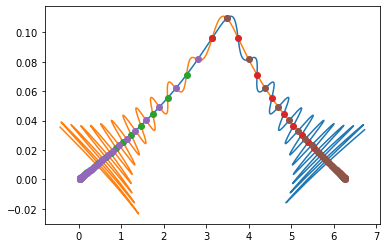

In [33]:

Niter = 40
# Unstable manifold
uvals = np.linspace(u0,u1,5000)
_,ps = manifold_approx(uvals,nmax,farr,garr)
xvals,yvals =  ps
for _ in range(Niter):
    ps = Tprime(ps)
    x,y = ps
    xvals = np.concatenate((xvals,x))
    yvals = np.concatenate((yvals,y))
XU,YU = R.T @ np.array((xvals,yvals))
plt.plot(XU,YU)

uvals = np.linspace(u0,u1inv,5000)
_,ps = manifold_approx(uvals,nmax,farr_inv,garr_inv)
xvals,yvals =  ps
for _ in range(Niter):
    ps = Tprime_inv(ps)
    x,y = ps
    xvals = np.concatenate((xvals,x))
    yvals = np.concatenate((yvals,y))

XS,YS = Rinv.T @ np.array((xvals,yvals))
plt.plot(2*np.pi-XS,-YS)

best_fit = least_squares(
    lambda tvec: get_distance(tvec[0],tvec[1],2e-2,30,30),
    x0=(0.5,0.5),
    bounds = ([0,0],[1,1]) 
)
for xy in get_pts(*best_fit.x,2e-2,30,30):
    plt.plot(*xy,'o')


best_fit = least_squares(
    lambda tvec: get_distance(tvec[0],tvec[1],2e-2,29,30),
    x0=(0.5,0.5),
    bounds = ([0,0],[1,1]) 
)
for xy in get_pts(*best_fit.x,2e-2,29,30):
    plt.plot(*xy,'o')


In [34]:
best_fit.x

array([0.82587629, 0.82517892])

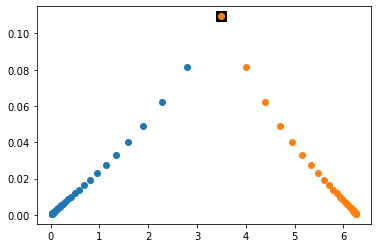

In [35]:
for xy in get_pts(*best_fit.x,2e-2,29,30):
    plt.plot(*xy,'o')
plt.scatter(*xy[:,-1],marker='s',color='k',s=100)



In [39]:
Ngrid = 40
x,y = [np.linspace(0.85,0.95,Ngrid) * u0 for _ in range(2)]
Z = np.zeros((Ngrid,Ngrid))
for i,uy in enumerate(y):
    for j,ux in enumerate(x):
        Z[i,j] = np.linalg.norm(get_distance(ux,uy,30))
X,Y = np.meshgrid(x,y)        

TypeError: get_distance() missing 2 required positional arguments: 'NS' and 'NU'

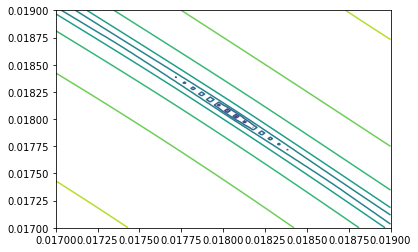

In [175]:
plt.contour(X,Y,np.log10(Z))

In [176]:
from scipy.optimize import least_squares

In [37]:
best_fit = least_squares(lambda uvec: get_distance(uvec[0],uvec[1],30), x0=(0.9*u0,0.9*u0), bounds = ([0.8*u0,0.8*u0],[u0,u0]) )

TypeError: get_distance() missing 2 required positional arguments: 'NS' and 'NU'

In [184]:
?get_distance

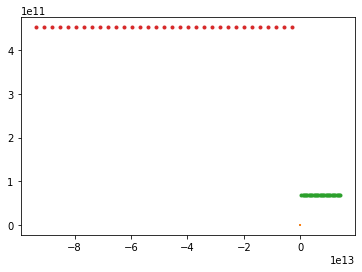

In [38]:
Niter = 38
# Unstable manifold
uvals = np.linspace(u0,u1,5000)
_,ps = manifold_approx(uvals,nmax,farr,garr)
xvals,yvals =  ps
for _ in range(Niter):
    ps = Tprime(ps)
    x,y = ps
    xvals = np.concatenate((xvals,x))
    yvals = np.concatenate((yvals,y))
XU,YU = R.T @ np.array((xvals,yvals))
plt.plot(XU,YU)

uvals = np.linspace(u0,u1inv,5000)
_,ps = manifold_approx(uvals,nmax,farr_inv,garr_inv)
xvals,yvals =  ps
for _ in range(Niter):
    ps = Tprime_inv(ps)
    x,y = ps
    xvals = np.concatenate((xvals,x))
    yvals = np.concatenate((yvals,y))

XS,YS = Rinv.T @ np.array((xvals,yvals))
plt.plot(2*np.pi-XS,-YS)


uS0,uU0 = best_fit.x
_,pU = manifold_approx(uU0,nmax,farr,garr)
_,pS = manifold_approx(uS0,nmax,farr_inv,garr_inv)
Upts,Spts = [],[]#[pU],[pS]
for i in range(33):
    pU = Tprime(pU)
    pS = Tprime_inv(pS)
    if True:
        Upts.append(pU)
        Spts.append(pS)
plt.plot(*(R.T@np.transpose(Upts)),'.')
plt.plot(*np.transpose(np.array([2*np.pi,0]) - (Rinv.T@np.transpose(Spts)).T),'.')